In [2]:
from spatial_statistics_tools import *

# specify directory
dir_ = "/Users/lukasjudith/Documents/Studium/Master Physik Heidelberg/Semester 2/01 HCI project/Code/spatial-statistical-analysis"
os.chdir(dir_)

## Load cell images and compute the K function

Filename: u373_clcbgfp_clcahalo_tgn405_con1568_1 5.tif
Image shape: (34, 4, 512, 512)
2083.36 2184.5117
112981950.0
112981960.0
112981944.0


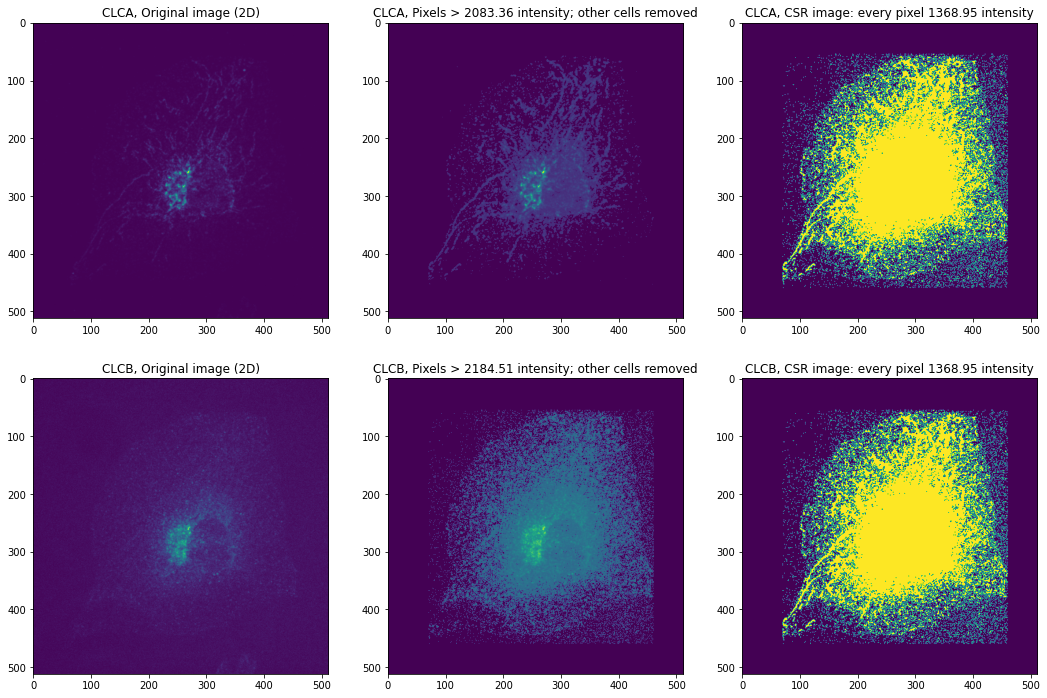

In [3]:
# name of the folder storing .tif files of cell images
folder = "CLC_Distribution_TIFFs" 
filename = "u373_clcbgfp_clcahalo_tgn405_con1568_1 5.tif"
print("Filename:", filename)

# get array with all pixel intensities and metadata of image
im, metadata = load_image(filename) 

# choose right channel and z position in .tif file
z = 23
channel_clca = 0
channel_clcb = 2

zxy_arr_clca = im[:, channel_clca, :, :]
zxy_arr_clcb = im[:, channel_clcb, :, :]
# extract 2D slices
xy_array_clca = zxy_arr_clca[z, :, :].astype("float32")
xy_array_clcb = zxy_arr_clcb[z, :, :].astype("float32")


mean_intensity_clca = np.mean(xy_array_clca)
mean_intensity_clcb = np.mean(xy_array_clcb)

print(mean_intensity_clca, mean_intensity_clcb)

# choose a threshold above which pixels are considered part of the cell
thresh_clca = mean_intensity_clca #- 80
thresh_clcb = mean_intensity_clcb #- 80
img_array_clca = xy_array_clca.copy()
img_array_clcb = xy_array_clcb.copy()


# apply treshold to set all points outside of the cell to zero
img_array_clca[img_array_clca<thresh_clca] = 0
img_array_clcb[img_array_clcb<thresh_clcb] = 0


# manually cut out other cells
img_array_clca[:, 460:] = 0
img_array_clca[:, :70] = 0
img_array_clca[460:, :] = 0
img_array_clca[:55, :] = 0
img_array_clcb[:, 460:] = 0
img_array_clcb[:, :70] = 0
img_array_clcb[460:, :] = 0
img_array_clcb[:55, :] = 0


total_int_clca = np.sum(img_array_clca)
total_int_clcb = np.sum(img_array_clcb)


# scale second array to have same total 
img_array_clcb = img_array_clcb * total_int_clca/total_int_clcb


img_array_csr = img_array_clcb + img_array_clca
n_pixels_csr = np.sum(img_array_csr>0)
total_intesity_new = np.sum(img_array_clcb)
mean_intensity_new = total_intesity_new/n_pixels_csr
img_array_csr[img_array_csr>0] = mean_intensity_new


print(np.sum(img_array_clcb))
print(np.sum(img_array_clca))
print(np.sum(img_array_csr))


fig, ax = plt.subplots(2,3, figsize=(18,12))
ax[0][0].imshow(xy_array_clca)#, vmin=min_intensity, vmax=max_intensity)
ax[0][0].set_title("CLCA, Original image (2D)")
ax[1][0].imshow(xy_array_clcb)#, vmin=min_intensity, vmax=max_intensity)
ax[1][0].set_title("CLCB, Original image (2D)")
ax[0][1].imshow(img_array_clca)#, vmin=min_intensity, vmax=max_intensity) 
ax[0][1].set_title(f"CLCA, Pixels > {thresh_clca:.2f} intensity; other cells removed")
ax[1][1].imshow(img_array_clcb)#, vmin=min_intensity, vmax=max_intensity) 
ax[1][1].set_title(f"CLCB, Pixels > {thresh_clcb:.2f} intensity; other cells removed")
ax[0][2].imshow(img_array_csr)#, vmin=min_intensity, vmax=max_intensity)
ax[0][2].set_title(f"CLCA, CSR image: every pixel {mean_intensity_new:.2f} intensity")
ax[1][2].imshow(img_array_csr)#, vmin=min_intensity, vmax=max_intensity)
ax[1][2].set_title(f"CLCB, CSR image: every pixel {mean_intensity_new:.2f} intensity")
#plt.savefig(path)
plt.show()

Completed in 0.92 seconds
Completed in 0.89 seconds
Completed in 0.86 seconds


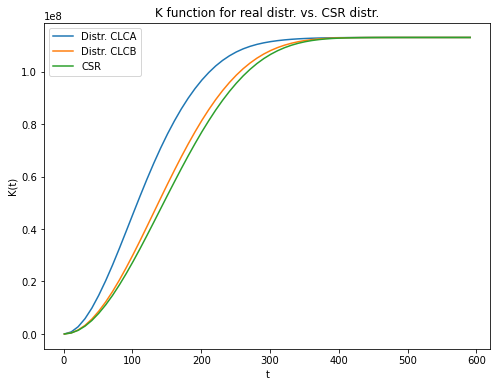

In [5]:
# results when using FFT-based auto-correlation
range_of_t = np.arange(1, 600, 10)

_lambda_csr = total_int_csr / A_csr

K_values_clca = ripleys_K_fast(img_array_clca, range_of_t)#, _lambda_clca)
K_values_clcb = ripleys_K_fast(img_array_clcb, range_of_t)#, _lambda_clcb)
K_values_csr = ripleys_K_fast(img_array_csr, range_of_t)#, _lambda_csr)


plt.figure(figsize=(8,6))
plt.title("K function for real distr. vs. CSR distr.")
plt.plot(range_of_t, K_values_clca, label="Distr. CLCA")
plt.plot(range_of_t, K_values_clcb, label="Distr. CLCB")
plt.plot(range_of_t, K_values_csr, label="CSR")
plt.xlabel("t")
plt.ylabel("K(t)")
plt.legend()
plt.show()
